# ブロブの検出
- ブロブとは塊
- 一つのpixelの塊

In [1]:
import cv2
import copy
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("data/src/Blob.png")
img_g = cv2.imread("data/src/Blob.png", 0)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### Blob img

([], [])

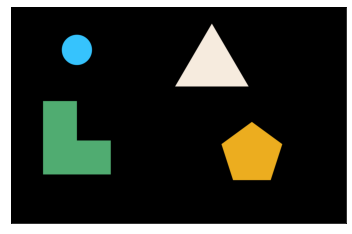

In [3]:
fn = r'static/Blob/Blob.png'
img = cv2.imread(fn)
# plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

#### 上記の image に対して別な色に塗り替えて、pixelを数えて面積を表示していく

### blob する場合は、２値化する必要がある

In [4]:
# 2値化
ret, img_bi = cv2.threshold(img_g, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("img", img_bi)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 2値化

([], [])

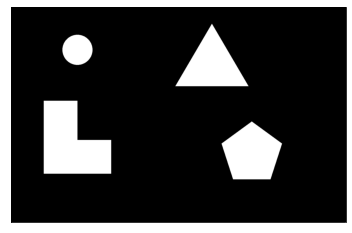

In [5]:
fn1 = r'static/Blob/Blob2.png'
img1 = cv2.imread(fn1)
# plt.figure(figsize=(12, 8))
plt.imshow(img1)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

In [6]:
nLabels, labelImage, stats, centroids = cv2.connectedComponentsWithStats(img_bi)

### nLabels : 検出した blob の個数

In [7]:
nLabels

5

※ 背景も　blob としてカウントされるので　5個になる

### labelImage : label の id がふられている

In [8]:
labelImage

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

### stats : 最小の x, 最小の y　という順番で格納されている
    - | x | y | width | height | blob面積(ピクセル数) |

In [9]:
stats

array([[      0,       0,    1672,    1078, 1578760],
       [    818,      88,     365,     311,   56799],
       [    256,     143,     150,     150,   17656],
       [    163,     471,     336,     363,   89208],
       [   1048,     574,     302,     288,   59993]], dtype=int32)

In [10]:
# img_blob に検出した情報を書き込んでいく
img_blob = copy.deepcopy(img)
h, w = img_g.shape
color = [255, 0, 0], [0, 255, 0], [0, 0, 255 ], [255, 255, 0]  # 色を代入するので予め色を作成しておく

for y in range(h):                                     # 残りは　for文を回す : label imag が正より多きものに色を塗っていく -> 0 < 大きい　＝　背景以外
    for x in range(w):
        if labelImage[y, x] > 0:                       # ある画像の y, x が ０ より大き場合 = 背景ではなく　 blob　になっている
            img_blob[y, x] = color[labelImage[y,x]-1]  # img_blob の y,x に先ほど作成した color を代入: labelImage は１より大きので 1から始まってしまうので -1
# ここで色塗りは完成

# 重心の部分に put tetx を使用して記述していく
for i in range(1, nLabels):                            # centroids　を使用する（円の重心を返してくれる）: 0から始めると背景に text が回ってしまうので
    xc = int(centroids[i][0])                          # 0,1 -> x, y という順番で入っているので
    yc = int(centroids[i][1])
    font = cv2.FONT_HERSHEY_COMPLEX
    scale = 1
    color = (255, 255, 255)
    # img_blob の　 stats の一番最後 = 面積を文字列化して渡す -> それぞれの重心へ -> font : scale : color :
    cv2.putText(img_blob, str(stats[i][-1]), (xc, yc), font, scale, color)

In [11]:
cv2.imshow("img", img_blob)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

([], [])

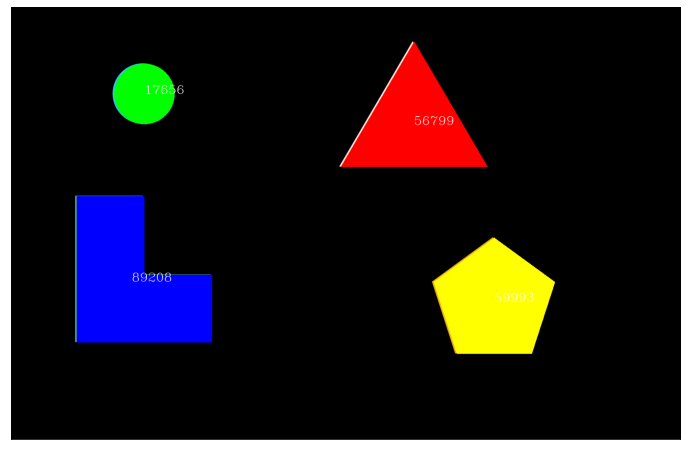

In [14]:
plt.figure(figsize=(12, 8))
plt.imshow(img_blob)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

#### img blob : 色変え, 面積（数値表示）

- labelImage が正の部分がしっかりと新たに塗りつぶされている
    - blob がしっかり検出されている証拠
- pixelを数えて面積として出力
    - centroids(重心)にしっかりと text として配置されている